# Packages

In [1]:
using Pkg; Pkg.activate(".")
using PyPlot
using TSO

  Activating environment at `/cobra/u/peitner/Turbospectrum/opacity_tables/tests/Project.toml`


# Load the binned opacities

In [2]:
folder = "DIS_MARCS_v0.4"

"DIS_MARCS_v0.3"

In [3]:
eos = reload(SqEoS,     joinpath(folder, "eos.hdf5"))
opa = reload(SqOpacity, joinpath(folder, "binned_opacities.hdf5"));

In [4]:
aos = @axed eos;

In [5]:
TSO.is_internal_energy(aos)

false

In [6]:
solar_model = Average3D(eos, "stagger_av.dat");

# Convert the EoS from T to E

In [7]:
eosE, opaE = switch_energy(aos, opa, upsample=2000);

In [8]:
aosE = @axed eosE
TSO.is_internal_energy(aosE)

true

In [9]:
TSO.fill_nan!(aosE, opaE)
TSO.set_limits!(aosE, opaE)

In [10]:
i = argmin(abs.(exp.(solar_model.lnT) .- 4000.0))
ρ_test = solar_model.lnρ[i]

-22.17929

In [11]:
T_test = 4000.0
r_test = ρ_test
e_test = lookup(aosE, :lnEi, r_test, T_test)

k  = [lookup(aos, opa,   :κ, r_test, T_test, i) for i in eachindex(opa.λ)]
kE = [lookup(aosE, opaE, :κ, r_test, e_test, i) for i in eachindex(opaE.λ)];

s  = [lookup(aos, opa,   :src, r_test, T_test, i) for i in eachindex(opa.λ)]
sE = [lookup(aosE, opaE, :src, r_test, e_test, i) for i in eachindex(opaE.λ)];

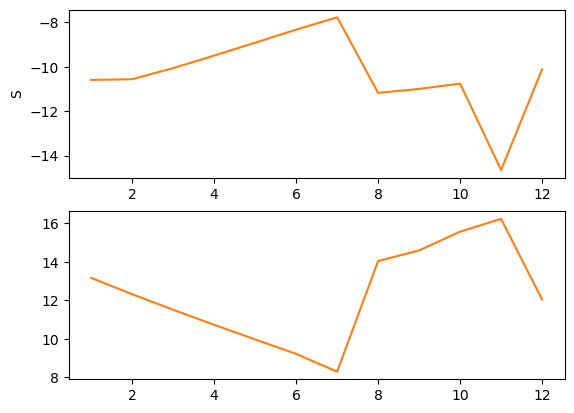

In [12]:
close()

f, ax = plt.subplots(2, 1)
ax[1].plot(opa.λ, log10.(k))
ax[1].plot(opaE.λ, log10.(kE))
ax[1].set_ylabel("κρ")

ax[2].plot(opa.λ, log10.(s))
ax[2].plot(opaE.λ, log10.(sE))
ax[1].set_ylabel("S")

gcf()

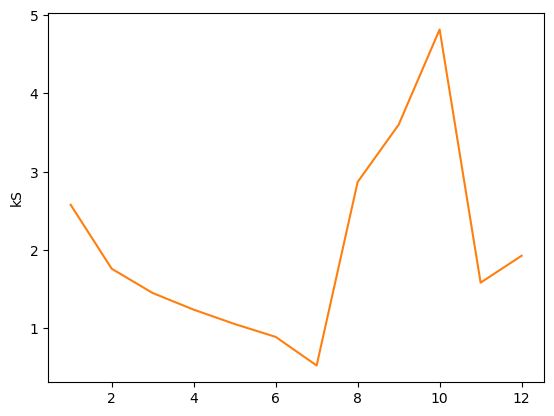

In [13]:
close()

f, ax = plt.subplots(1, 1)
ax.plot(opa.λ, log10.(k .* s))
ax.plot(opaE.λ, log10.(kE .* sE))
ax.set_ylabel("kS")

gcf()

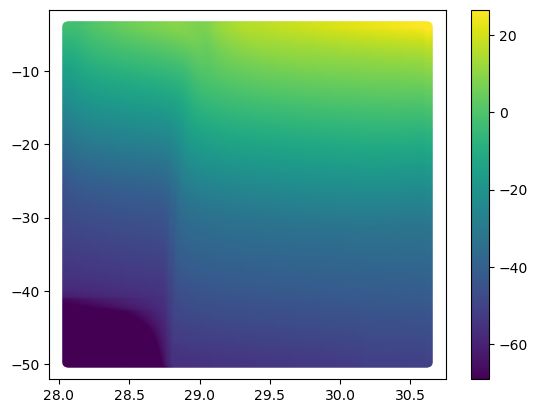

In [14]:
close()

tt, rr = meshgrid(aosE)
#ee, rr = meshgrid(aosE)

plt.scatter(tt, rr, c=log.(opaE.κ[:,:,7]))
plt.colorbar()

gcf()

# Save for dispatch

In [15]:
@show size(opaE.src) size(opaE.κ) 
@show size(eosE.lnRoss) size(eosE.lnPg) size(eos.lnNe)


size(opaE.src) = (500, 138, 12)
size(opaE.κ) = (500, 138, 12)


size(eosE.lnRoss) = (500, 138)
size(eosE.lnPg) = (500, 138)
size(eos.lnNe) = (49, 138)


(49, 138)

In [16]:
@show size(opaE.src) size(opaE.κ) 
@show size(eosE.lnRoss) size(eosE.lnPg) size(eos.lnNe)

size(opaE.src) = (500, 138, 12)
size(opaE.κ) = (500, 138, 12)
size(eosE.lnRoss) = (500, 138)
size(eosE.lnPg) = (500, 138)
size(eos.lnNe) = (49, 138)


(49, 138)

In [17]:
folder_new = "DIS_MARCS_v0.3.2"
!isdir(folder_new) && mkdir(folder_new) 

for_dispatch(eosE, opaE.κ, opaE.src, ones(eltype(opaE.src), size(opaE.src)...))

save(opaE, joinpath(folder_new, "binned_opacities.hdf5"))
save(eosE, joinpath(folder_new, "eos.hdf5"))

mv("tabparam.in", joinpath(folder_new, "tabparam.in"), force=true)
mv("eostable.dat", joinpath(folder_new, "eostable.dat"), force=true)
mv("rhoei_radtab.dat", joinpath(folder_new, "rhoei_radtab.dat"), force=true);
